<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [ ]:
iris_data = datasets.load_iris()

In [179]:
rand_sample1 = np.array([[random.uniform(-4,1), random.uniform(-2,4),1] for i in range(100)]).T
rand_sample2 = np.array([[random.uniform(-1,4), random.uniform(-2,4),1] for i in range(100)]).T
rand_sample3 = np.array([[random.uniform(-3,3), random.uniform(-4,0),1] for i in range(100)]).T
rand_sample = np.concatenate((rand_sample1,rand_sample2,rand_sample3),axis=1)
rand_target = np.concatenate((np.zeros(100),np.zeros(100)+1.0,np.zeros(100)+2.0),axis=0)

In [180]:
class linear_normal_equation():

  def train(self, x, t):
    self.X = np.matrix(x)
    t_onehot = []
    for i in t:
      tmp = np.zeros(int(max(t))+1)
      tmp[int(i)] = 1
      t_onehot.append(tmp)
    self.T = np.matrix(t_onehot)
    self.W = (self.X * self.X.T).I * self.X * self.T
  def recognize_max(self, x):
    self.x = np.matrix(x)
    Y = self.x * self.W
    return np.argmax(Y, axis=1)

In [181]:
lne = linear_normal_equation()

In [182]:
lne.train(rand_sample, rand_target)

In [183]:
rand_target[150]

1.0

In [184]:
lne.recognize_max(rand_sample.T[150])

matrix([[0]])

In [173]:
def boundary(w, x, y):
  w1 = w.T[0]
  w2 = w.T[1]
  w3 = w.T[2]

  z = np.empty((len(x),len(y)),dtype='float')
  for i in range(len(y)):
    for j in range(len(x)):
      x_v = np.matrix([x[j],y[i],1]).T
      z[i][j] = (w1-w2) * x_v
        z[i][j] = (w2-w3) * x_v
        z[i][j] = (w3-w1) * x_v

  '''
  z2 = np.empty((len(x),len(y)),dtype='float')
  for i in range(len(y)):
    for j in range(len(x)):
      x_v = np.matrix([x[j],y[i],1]).T
      z2[i][j] = (w2-w3) * x_v
  z3 = np.empty((len(x),len(y)),dtype='float')
  for i in range(len(y)):
    for j in range(len(x)):
      x_v = np.matrix([x[j],y[i],1]).T
      z3[i][j] = (w3-w1) *x_v
  '''
  
  return  z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


<a list of 0 text.Text objects>

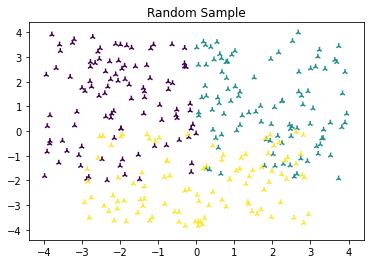

In [175]:
plt.title("Random Sample")
plt.xlim(-4.4, 4.4)
plt.ylim(-4.4, 4.4)
plt.scatter(rand_sample[0], rand_sample[1], c=rand_target, marker='2')
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
z = boundary(lne.W, x, y)
contour = plt.contour(x, y, z, [0])
#contour = plt.contour(x, y, z2, [0])
#contour = plt.contour(x, y, z3, [0])
plt.clabel(contour, colors=('k'))

In [108]:
lne.W

matrix([[-0.0488877 ,  0.03044156,  0.01844614],
        [ 0.04396183,  0.00667845, -0.05064029],
        [ 0.34480092,  0.33754287,  0.31765621]])